In [3]:
# INSURANCE CHARGES PREDICTION BY USING LINEAR REGRESSION

In [5]:
# 1. WE NEED TO PREDICT THE CHARGES BASED ON  CUSTOMER DETAILS
# 2. DATA DESCRIPTION
    # IN THIS WE HAVE A 13 COLUMNS
    # SEX,SMOKER AND REGION WILL BE OBJECTIVE(OR)DISCRIPTIVE COLUMNS
    # AND THE REMAINING ALL COLUMNS ARE NUMERICAL COLUMMNS
    

In [11]:
# 3. DATA CLEANING
  # 1. NULL VALUES
  # 2. DUPLICATE VALUES
  # 3. OULIERS
  # 4. MULTICOLLINEARITY -> VARAINCE INFLATION FACTOR(VIF)
  # 5. LABEL ENCODING   ->  CONVERTING THE OBJECTIVE COLUMNS INTO NUMERICAL COLUMNS FOR UNDERSTANDING THE DATA BY REGRESSION MODEL

In [20]:
# 4. SPLITTING THE DATA INTO TRAIN AND TESTING PARTS
# 5. MODEL BUILDING  ->  LINEAR REGRESSION MODEL
# 6. CHECKING THE MODEL ACCURACY ->  BY R2 SCORE
# 7. CONCLUSION INSIGHTS

In [21]:
# IMPORTING THE PYTHON LIBRARIES

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# WE HAVE TO IMPORTING THE DATA SET

In [24]:
data=pd.read_csv(r"C:\Users\Kolli Srinivas\Downloads\new_insurance_data.csv")
data

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [25]:
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [26]:
data.tail()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,170380500.5,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,201515184.8,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,223644981.3,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,252892382.6,3.0,4.006359e+09,southeast,62592.87309
1337,54.0,female,47.410,0.0,yes,63982.80926,31.0,1100328.0,261631699.3,3.0,4.117197e+09,southeast,63770.42801


In [27]:
# CHECKING THE INFORMATION ABOUT THE DATA AND SMALL SUMMARY

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [29]:
# exploratory data analysis
   # 1. NULL VALUES
   # 2. DUPLICATE VALUES
   # 3. OUTLIERS
   # 4. MULTI COLLINEARITY  ->   VIF
   # 5. LABEL ENCONDING

In [30]:
# 1. Null Values

In [31]:
data.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [32]:
data.dropna(inplace=True)

In [33]:
# 2. Duplicate Values

In [34]:
data.duplicated().sum()

0

In [37]:
# 3. Outliers

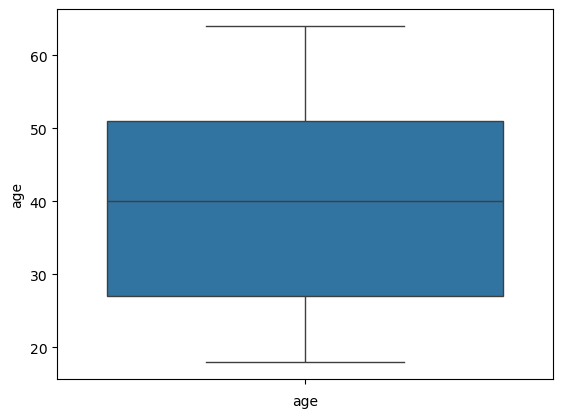

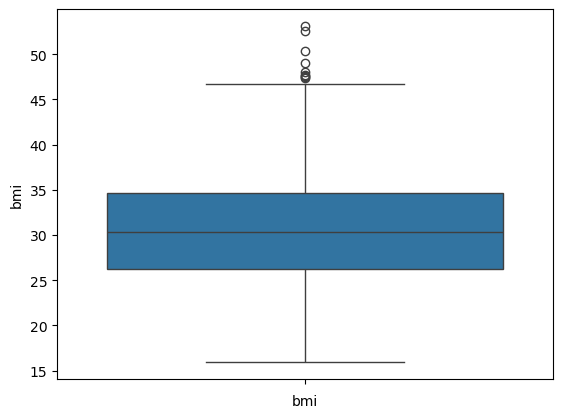

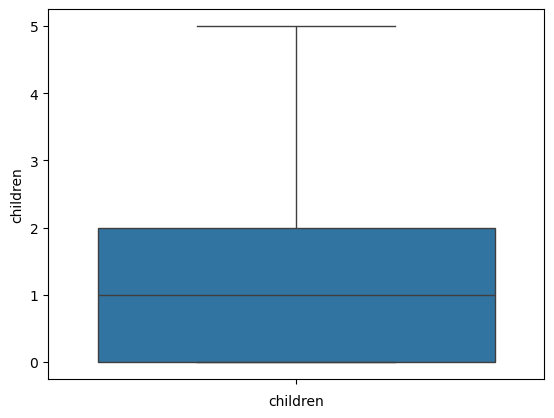

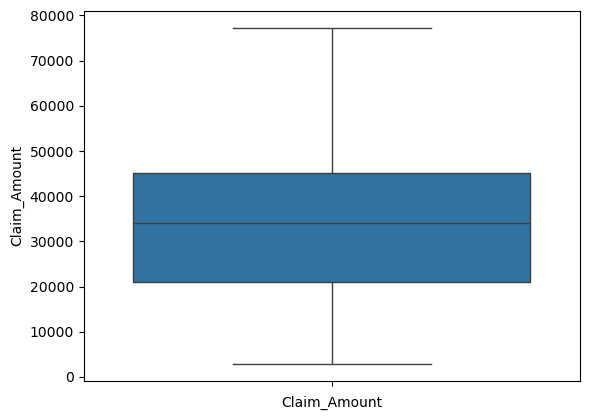

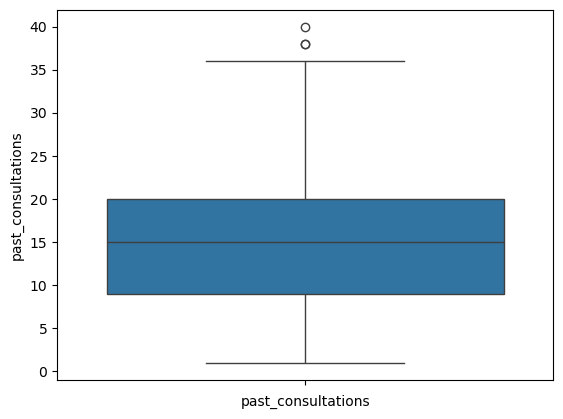

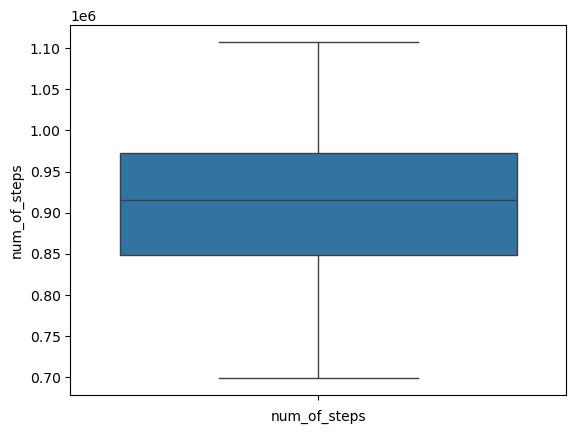

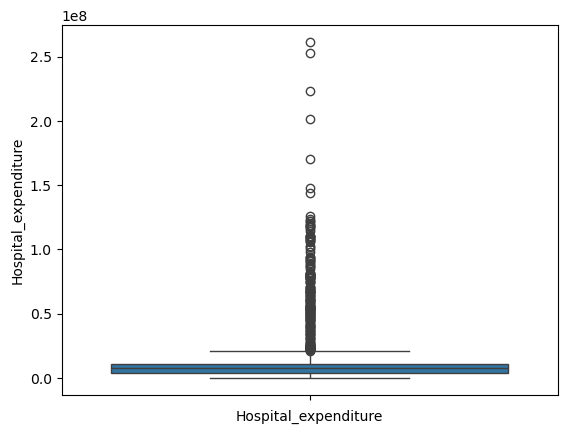

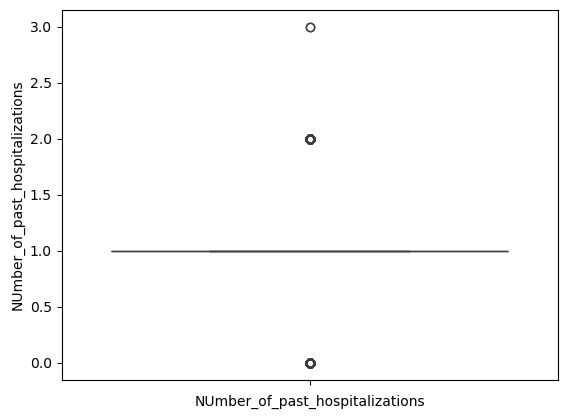

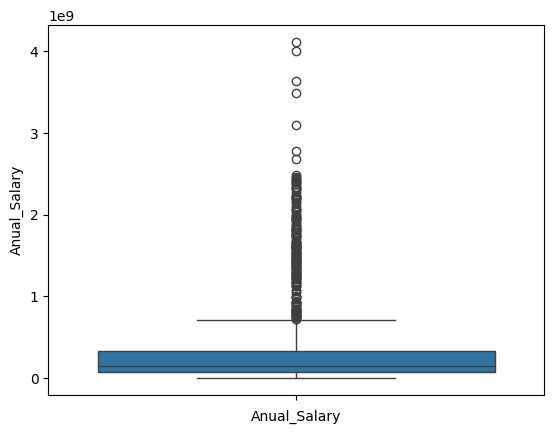

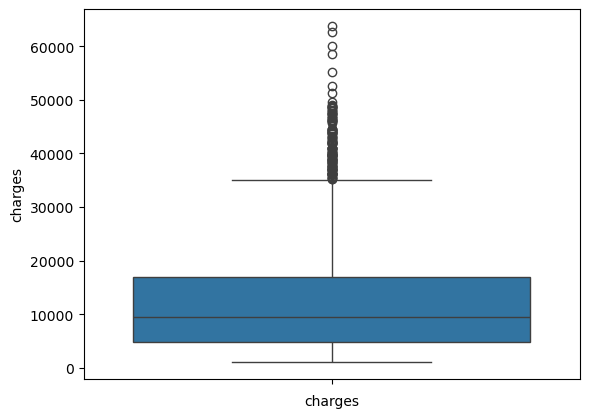

In [38]:
for col in data.columns:
    if data[col].dtype!='object':
        sns.boxplot(data[col])
        plt.xlabel(col)
        plt.show()

In [39]:
# IN THIS DATA SET OUTLIERS IS NOT REMOVED BECAUSE OF ITS DATA SENSITIVE

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1287 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1287 non-null   float64
 1   sex                              1287 non-null   object 
 2   bmi                              1287 non-null   float64
 3   children                         1287 non-null   float64
 4   smoker                           1287 non-null   object 
 5   Claim_Amount                     1287 non-null   float64
 6   past_consultations               1287 non-null   float64
 7   num_of_steps                     1287 non-null   float64
 8   Hospital_expenditure             1287 non-null   float64
 9   NUmber_of_past_hospitalizations  1287 non-null   float64
 10  Anual_Salary                     1287 non-null   float64
 11  region                           1287 non-null   object 
 12  charges                  

In [41]:
# 4. multicollinearity   ->   VARIANCE AND INFLATION FACTOR

# MEASURING THE MULTICOLLINEARITY BY USING THE VARIANCE INFALTION FACTOR

In [42]:
# THE DATA WILL BE DIVIDED INTO TWE CATEGORIES X AND Y

In [43]:
x=data.drop('charges',axis=1)
y=data['charges']

In [44]:
x

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast


In [45]:
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1333    55135.40209
1334    58571.07448
1335    60021.39897
1336    62592.87309
1337    63770.42801
Name: charges, Length: 1287, dtype: float64

In [ ]:
# VIF -> VARIANCE INFLATION FACTOR  (CHECKING THE MULTI COLLINEARITY IT IS LESS THAN <5)

In [47]:
# variance inflation factor

In [48]:
vif_data=pd.DataFrame()

In [49]:
vif_data

""


In [50]:
vif_data['features']=x.columns

In [51]:
vif_data

,features
0,age
1,sex
2,bmi
3,children
4,smoker
5,Claim_Amount
6,past_consultations
7,num_of_steps
8,Hospital_expenditure
9,NUmber_of_past_hospitalizations


In [52]:
x.values

array([[18.0, 'male', 23.21, ..., 0.0, 55784970.05, 'southeast'],
       [18.0, 'male', 30.14, ..., 0.0, 13700885.19, 'southeast'],
       [18.0, 'male', 33.33, ..., 0.0, 73523107.27, 'southeast'],
       ...,
       [52.0, 'male', 34.485, ..., 2.0, 3640806683.0, 'northwest'],
       [45.0, 'male', 30.36, ..., 3.0, 4006358505.0, 'southeast'],
       [54.0, 'female', 47.41, ..., 3.0, 4117196637.0, 'southeast']],
      dtype=object)

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le=LabelEncoder()

for col in x.columns:
    if x[col].dtype=='object':
        x[col]=le.fit_transform(x[col])

In [57]:
vif_values=[]
for i in range(len(x.columns)):
    vif_v=variance_inflation_factor(x.values,i)
    vif_values.append(vif_v)

vif_data['vif_values']=vif_values

In [58]:
vif_data

,features,vif_values
0,age,13.710629
1,sex,2.009831
2,bmi,30.159136
3,children,1.972347
4,smoker,4.073851
5,Claim_Amount,6.952488
6,past_consultations,8.593570
7,num_of_steps,71.160415
8,Hospital_expenditure,30.397183
9,NUmber_of_past_hospitalizations,17.904578


In [59]:
x.drop('num_of_steps',axis=1,inplace=True)

In [60]:
vif_data=pd.DataFrame()
vif_data

vif_data['features']=x.columns
vif_data

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_values=[]
for i in range(len(x.columns)):
    vif_v=variance_inflation_factor(x.values,i)
    vif_values.append(vif_v)

vif_data['vif_values']=vif_values

In [61]:
vif_data

,features,vif_values
0,age,10.736430
1,sex,1.984762
2,bmi,14.403274
3,children,1.955069
4,smoker,3.553972
5,Claim_Amount,6.464483
6,past_consultations,7.933581
7,Hospital_expenditure,30.250111
8,NUmber_of_past_hospitalizations,15.564821
9,Anual_Salary,46.506789


In [62]:
x.drop('Anual_Salary',axis=1,inplace=True)

In [63]:
vif_data=pd.DataFrame()
vif_data

vif_data['features']=x.columns
vif_data

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_values=[]
for i in range(len(x.columns)):
    vif_v=variance_inflation_factor(x.values,i)
    vif_values.append(vif_v)

vif_data['vif_values']=vif_values

In [64]:
vif_data

,features,vif_values
0,age,10.728714
1,sex,1.984411
2,bmi,13.717810
3,children,1.937420
4,smoker,2.899118
5,Claim_Amount,6.463172
6,past_consultations,7.761744
7,Hospital_expenditure,2.958474
8,NUmber_of_past_hospitalizations,12.990020
9,region,2.914537


In [65]:
x.drop('NUmber_of_past_hospitalizations',axis=1,inplace=True)

In [66]:
vif_data=pd.DataFrame()
vif_data

vif_data['features']=x.columns
vif_data

vif_values=[]
for i in range(len(x.columns)):
    vif=variance_inflation_factor(x.values,i)
    vif_values.append(vif)

vif_data['vif_values']=vif_values

In [67]:
vif_data

,features,vif_values
0,age,8.506308
1,sex,1.977323
2,bmi,13.496627
3,children,1.823566
4,smoker,2.569182
5,Claim_Amount,6.303838
6,past_consultations,7.608727
7,Hospital_expenditure,2.642715
8,region,2.904806


In [68]:
x.drop('bmi',axis=1,inplace=True)

In [69]:
vif_data=pd.DataFrame()
vif_data

vif_data['features']=x.columns
vif_data

vif_values=[]
for i in range(len(x.columns)):
    vif=variance_inflation_factor(x.values,i)
    vif_values.append(vif)

vif_data['vif_values']=vif_values

In [70]:
vif_data

,features,vif_values
0,age,6.691831
1,sex,1.893288
2,children,1.805392
3,smoker,2.500650
4,Claim_Amount,5.588845
5,past_consultations,6.928823
6,Hospital_expenditure,2.641633
7,region,2.580397


In [71]:
x.drop('past_consultations',axis=1,inplace=True)

In [72]:
vif_data=pd.DataFrame()
vif_data

vif_data['features']=x.columns
vif_data

vif_values=[]
for i in range(len(x.columns)):
    vif=variance_inflation_factor(x.values,i)
    vif_values.append(vif)

vif_data['vif_values']=vif_values

In [73]:
vif_data

,features,vif_values
0,age,5.338812
1,sex,1.873832
2,children,1.785131
3,smoker,2.328832
4,Claim_Amount,5.307269
5,Hospital_expenditure,2.529781
6,region,2.548039


In [74]:
x.drop('age',axis=1,inplace=True)

In [75]:
vif_data=pd.DataFrame()
vif_data

vif_data['features']=x.columns
vif_data

vif_values=[]
for i in range(len(x.columns)):
    vif=variance_inflation_factor(x.values,i)
    vif_values.append(vif)

vif_data['vif_values']=vif_values

In [76]:
# AFTER COMPLETION OF VIF THE COLUMNS MULTICOLLINEARITY IS LESS THAN <5
vif_data

,features,vif_values
0,sex,1.781716
1,children,1.715774
2,smoker,2.269380
3,Claim_Amount,3.517376
4,Hospital_expenditure,2.506668
5,region,2.316512


In [77]:
x

,sex,children,smoker,Claim_Amount,Hospital_expenditure,region
0,1,0.0,0,29087.54313,4.720921e+06,2
1,1,0.0,0,39053.67437,4.329832e+06,2
2,1,0.0,0,39023.62759,6.884861e+06,2
3,1,0.0,0,28185.39332,4.274774e+06,2
4,1,0.0,0,14697.85941,3.787294e+06,2
...,...,...,...,...,...,...
1333,0,0.0,1,63142.25346,1.703805e+08,1
1334,0,1.0,1,43419.95227,2.015152e+08,0
1335,1,3.0,1,52458.92353,2.236450e+08,1
1336,1,0.0,1,69927.51664,2.528924e+08,2


In [63]:
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1333    55135.40209
1334    58571.07448
1335    60021.39897
1336    62592.87309
1337    63770.42801
Name: charges, Length: 1287, dtype: float64

In [78]:
# IMPORTING TRAIN AND TESTING FOR UNDERSTANDING ANG PREDICTING THE CHARGES

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [81]:
x_train

,sex,children,smoker,Claim_Amount,Hospital_expenditure,region
510,1,1.0,0,16460.954610,8.084459e+06,2
479,1,5.0,0,41495.241570,2.395061e+06,2
316,0,2.0,0,5556.193100,1.000335e+07,3
803,0,3.0,0,41327.384140,2.155938e+06,3
528,0,0.0,0,8760.653674,9.268380e+06,0
...,...,...,...,...,...,...
802,0,2.0,0,12992.139950,4.075903e+06,0
875,1,0.0,0,41844.564980,1.191697e+07,1
1261,1,4.0,1,52206.093400,6.842734e+07,3
595,1,1.0,0,37775.304960,5.910532e+06,0


In [82]:
y_train

510      7147.472800
479      6653.788600
316      4529.477000
803     11411.685000
528      7323.734819
            ...     
802     11396.900200
875     12523.604800
1261    40182.246000
595      8334.457550
721     10141.136200
Name: charges, Length: 1029, dtype: float64

In [83]:
x_test

,sex,children,smoker,Claim_Amount,Hospital_expenditure,region
692,1,0.0,0,8130.290032,4.265125e+06,0
355,0,2.0,0,19683.131830,5.257252e+06,3
1050,1,0.0,1,24382.580560,1.028991e+07,2
512,1,1.0,0,41827.764410,3.210070e+06,2
845,1,3.0,0,52155.958830,7.683186e+06,2
...,...,...,...,...,...,...
793,1,1.0,0,36343.864730,8.089966e+06,2
1098,1,0.0,0,42750.268640,1.076586e+07,1
54,1,1.0,0,28521.842900,4.960146e+06,2
965,1,0.0,0,15996.028250,8.909351e+06,0


In [84]:
y_test

692      9722.76950
355      4931.64700
1050    19350.36890
512      7152.67140
845     11987.16820
           ...     
793     11326.71487
1098    21984.47061
54       1711.02680
965     14394.55790
971     14455.64405
Name: charges, Length: 258, dtype: float64

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
model=LinearRegression()

In [87]:
model.fit(x_train,y_train)

LinearRegression()

In [88]:
predict=model.predict(x_test)

In [89]:
predict

array([ 5753.11971752,  7399.8266316 , 19204.86103531,  8195.12033617,
       11350.95021122,  7504.02743774, 19501.72257631,  8206.41218139,
        7435.90087335, 11437.27702729, 10447.3075296 ,  8526.13612962,
       40313.5027543 , 34022.51200371,  8144.44902748, 48980.61788606,
        5937.63465871,  6738.59506437,  6436.89847742,  9168.24918272,
        7108.26414927,  6630.0988421 ,  9879.84442756,  8977.16192249,
        6326.18591975,  4875.75031687,  5128.0409156 ,  9449.54781536,
       21022.08518672,  7938.53779967,  7614.97156566, 12630.16721452,
       14544.850394  ,  8330.68216913,  8208.66756614, 10274.76515936,
        7943.14083733,  9032.25014819, 14735.39436404,  9327.66729327,
        8285.64423452, 10296.17104236,  6648.27067165, 40182.60847191,
       10420.54519202, 38054.36198995, 36581.35832888,  7422.79558455,
       10715.29062259, 22265.44369554, 41350.39228866, 23333.60407732,
        7870.12708863,  5609.72277436,  6405.64482196, 32552.60867864,
      

In [90]:
prediction_data=pd.DataFrame()

In [91]:
prediction_data['actual_values']=y_test
prediction_data['predicted_values']=predict


In [92]:
prediction_data

,actual_values,predicted_values
692,9722.76950,5753.119718
355,4931.64700,7399.826632
1050,19350.36890,19204.861035
512,7152.67140,8195.120336
845,11987.16820,11350.950211
...,...,...
793,11326.71487,9037.142198
1098,21984.47061,9867.352077
54,1711.02680,7622.289658
965,14394.55790,7563.949539


In [93]:
prediction_data['error']=prediction_data['actual_values'] - prediction_data['predicted_values']

In [94]:
prediction_data

,actual_values,predicted_values,error
692,9722.76950,5753.119718,3969.649782
355,4931.64700,7399.826632,-2468.179632
1050,19350.36890,19204.861035,145.507865
512,7152.67140,8195.120336,-1042.448936
845,11987.16820,11350.950211,636.217989
...,...,...,...
793,11326.71487,9037.142198,2289.572672
1098,21984.47061,9867.352077,12117.118533
54,1711.02680,7622.289658,-5911.262858
965,14394.55790,7563.949539,6830.608361


In [95]:
from sklearn.metrics import *

In [97]:
r2_score(predict,y_test)*100

74.67069416259355

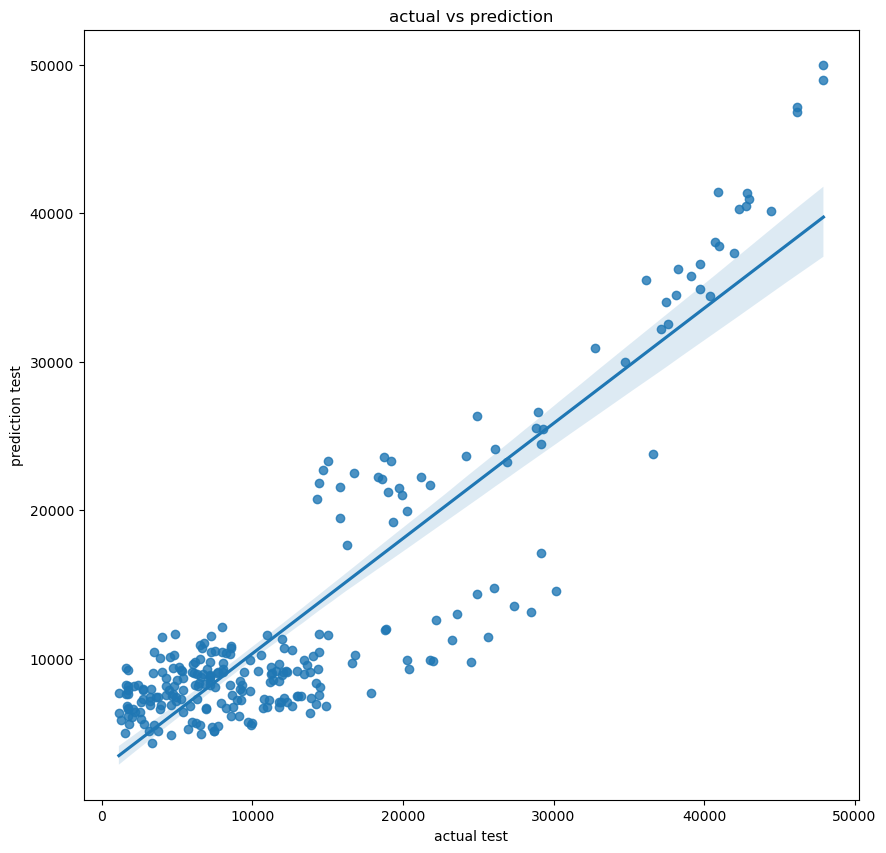

In [98]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_test,y=predict)
plt.xlabel('actual test')
plt.ylabel('prediction test')
plt.title('actual vs prediction')
plt.show()

In [87]:
# The accuracy of the model is 75 percentage